# Import Library dan Dataset

In [1]:
# Import library
import pandas as pd
pd.options.display.max_columns = 50

# Import dataset
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

# Tampilkan jumlah baris dan kolom
print(df_load.shape)

# Tampilkan 5 data teratas
print(df_load.head(5))

# Jumlah ID yang unik
print(df_load.customerID.nunique())

(7113, 22)
   UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0           No  No phone service             DSL             No          Yes   
1          Yes                No             DSL            Yes           No   
2          Yes                No             DSL            Yes          Yes   
3           No  No phone service             DSL            Yes           No   
4          Yes                No     Fiber optic             No           No   

  DeviceProtection TechSupport St

- UpdatedAt: Periode of Data taken
- customerID: Customer ID
- gender: Whether the customer is a male or a female (Male, Female)
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- Churn: Whether the customer churned or not (Yes or No)

# Memfilter ID Number Pelanggan Format Tertentu

kriteria:

- Panjang karakter adalah 11-12.
- Terdiri dari Angka Saja, tidak diperbolehkan ada karakter selain angka
- Diawali dengan angka 45 2 digit pertama.

In [2]:
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')

df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)

print('Hasil jumlah ID Customer yang terfilter adalah', df_load['customerID'].count())

Hasil jumlah ID Customer yang terfilter adalah 7006


# Memfilter Duplikasi ID Number Pelanggan

In [3]:
# Drop Duplicate Rows
df_load.drop_duplicates()

# Drop duplicate ID sorted by Periode
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])

print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah', df_load['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993


# Mengatasi Missing Values dengan Penghapusan Rows

In [4]:
print('Total missing values data dari kolom Churn',df_load['Churn'].isnull().sum())

Total missing values data dari kolom Churn 43


In [5]:
# Dropping all Rows with spesific column (churn)
df_load.dropna(subset=['Churn'], inplace=True)

print('Total Rows dan kolom Data setelah dihapus data Missing Values adalah', df_load.shape)

Total Rows dan kolom Data setelah dihapus data Missing Values adalah (6950, 22)


# Mengatasi Missing Values dengan Pengisian Nilai tertentu

In [6]:
print('Status Missing Values :', df_load.isnull().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

Status Missing Values : True

Jumlah Missing Values masing-masing kolom, adalah:
tenure              99
MonthlyCharges      26
TotalCharges        15
Churn                0
InternetService      0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
UpdatedAt            0
dtype: int64


In [7]:
# Handling missing values Tenure fill with 11
df_load['tenure'].fillna(11, inplace=True)

In [8]:
# Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges', 'TotalCharges']):
  median = df_load[col_name].median()
  df_load[col_name].fillna(median, inplace=True)

In [9]:
print('\nJumlah Missing Values setelah di imputer datanya, adalah')
print(df_load.isnull().sum().sort_values(ascending=False))


Jumlah Missing Values setelah di imputer datanya, adalah
Churn               0
TotalCharges        0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
UpdatedAt           0
dtype: int64


# Mendeteksi adanya Outlier (Boxplot)

In [10]:
print('\nPersebaran data sebelum ditangani Outlier: ')
print(df_load[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())


Persebaran data sebelum ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


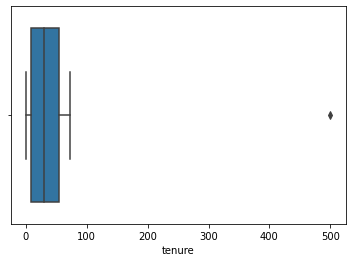

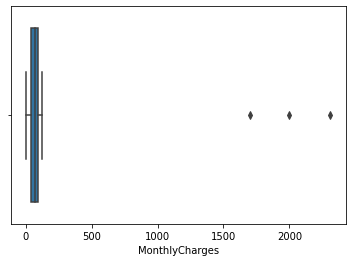

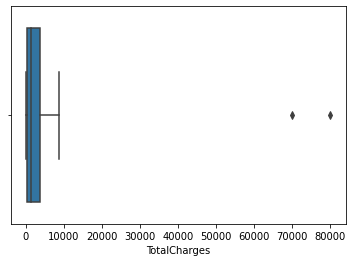

In [11]:
# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Masukkan variable
plt.figure() # untuk membuat figure baru
sns.boxplot(x = df_load['tenure'])
plt.show()

plt.figure() # untuk membuat figure baru
sns.boxplot(x = df_load['MonthlyCharges'])
plt.show()

plt.figure() # untuk membuat figure baru
sns.boxplot(x = df_load['TotalCharges'])
plt.show()

# Mengatasi Outlier

In [12]:
# Handling with IQR
Q1 = (df_load[['tenure', 'MonthlyCharges', 'TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure', 'MonthlyCharges', 'TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum = Q3 + (1.5 * IQR)
print('Nilai Maximum dari masing-masing Variable adalah ')
print(maximum)

minimum = Q1 - (1.5 * IQR)
print('\nNilai Minimum dari masing-masing Variable adalah ')
print(minimum)

more_than = (df_load > maximum)
lower_than = (df_load < minimum)

df_load = df_load.mask(more_than, maximum, axis=1)
df_load = df_load.mask(lower_than, minimum, axis=1)

Nilai Maximum dari masing-masing Variable adalah 
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Nilai Minimum dari masing-masing Variable adalah 
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64


In [13]:
print('\nPersebaran data setelah ditangani Outlier: ')
print(df_load[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())


Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


# Mendeteksi Nilai yang tidak Standar

In [14]:
# Loop
for col_name in list(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']):
	print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable', col_name)
	print(df_load[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized  Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Befor

# Menstandarisasi Variable Kategorik

In [15]:
df_load = df_load.replace(['Wanita', 'Laki-Laki', 'Churn',' Iya'], ['Female', 'Male', 'Yes', 'Yes'])

# Loop
for col_name in list(['gender', 'Dependents', 'Churn']):
	print('\nUnique Values Count \033[1m' + 'After Standardized \033[0mVariable', col_name)
	print(df_load[col_name].value_counts())


Unique Values Count After Standardized Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64
